# 3장. 신경망 시작하기
## 3.1 신경망의 구조

신경망의 요소
- 네트워크를 구성하는 층
- 입력 데이터와 그에 상응하는 타깃
- 학습에 사용할 피드백 신호를 정의하는 손실 함수
- 학습 진행 방식을 결정하는 옵티마이저

### 층: 딥러닝의 구성 단위

**하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈**

층마다 적절한 텐서 포맷과 데이터 처리 방식이 다름

**2D 텐서**
- 완전 연결 층
- 밀집 층, 밀집 연결 층

**3D 텐서**
- 순환 층

**4D 텐서**
- 2D 합성곱 층


층 호환성
- 각 층이 특정 크기의 입력 텐서만 받고 특정 크기의 출력 텐서를 반환





In [ ]:
from keras import layers

layer = layers.Dense(32, input_shape = (784, ))

In [ ]:
from keras import models

model = models.Sequential()
model.add(layers.Dense(32, input_shape = (784, )))
model.add(layers.Dense(10))

모델에 추가 된 층은 자동적으로 위 층의 출력에 맞추기 때문에 호환성을 걱정할 필요가 없음

### 모델: 층의 네트워크
**층으로 만든 비순환 유향 그래프**
> 비순향 유향 그래프(DAG)란, 그래프의 에지에 방향이 있고 한 노드에서 다시 자기 자신으로 돌아올 경로가 없는 그래프

일반적인 네트워크 구조
- 하나의 입력, 하나의 출력

다양한 네트워크 구조
- 가지(branch)가 2개인 네트워크
- 출력이 여러개인 네트워크
- 인셉션(Inception) 블록

네트워크 구조를 통해 가설 공간 정의
> 가설 공간이란, 가능성 있는 공간을 사전에 정의하고 피드백 신호의 도움을 받아 입력 데이터에 대한 유용한 변환을 찾는 것


### 손실 함수와 옵티마이저: 학습 과정을 조절하는 열쇠

**손실함수 또는 목적함수 : 훈련하는 동안 최소화될 값, 성공 지표**  
**옵티마이저 : 손실 함수를 기반으로 네트워크 업데이트를 결정, 특정 종류의 확률적 경사 하강법(SGD) 구현**  

#### 손실 함수 선택 지침  
1. **분류 문제**
 - 2개 클래스 : 이진 크로스엔트로피(binary crossentropy)
 - 다중 클래스 : 범주형 크로스엔트로피(categorical crossentropy)

2. **회귀 문제**
 - 평균 제곱 오차

3. **시퀀스 학습 문제**
 - CTC(Connection Temporal Classification)


## 3.2 케라스
**딥러닝 모델을 간편하게 만들고 훈련시킬 수 있는 파이썬 딥러닝 프레임워크**  

### 특징
- CPU와 GPU 사용 가능
- API를 활용해 딥러닝 모델의 프로토타입을 빠르게 만들 수 있음
- 합성곱 신경망과 순환 신경망을 지원 및 자유롭게 조합
- 어떤 네트워크 구조든 만들 수 있음

### 케라스의 벡엔드 엔진
- 텐서플로
- 씨아노
- CNTK

### 케라스 작업 흐름
1. 입력 텐서와 타킷 텐서로 이루어진 훈련 데이터 정의
2. 입력과 타깃을 매핑하는 층으로 이루어진 네트워크(또는 모델) 정의
3. 손실 함수, 옵티마이저, 측정 지표 선택 후 학습 과정 설정
4. 훈련 데이터에 대해 모델의 `fit()` 메서드 반복적으로 호출

### 모델 정의 방법
1. **Sequential 클래스**
2. **함수형 API**


In [ ]:
# Sequential 클래스
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (784, )))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
# 함수형 API
input_tensor = layers.Input(shape = (784, ))
x = layers.Dense(32, activation = 'relu')(input_tensor)
output_tensor = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(inputs = input_tensor, outputs = output_tensor)

모델 구조 정의 후 과정은 모두 동일

In [ ]:
# 컴파일 단계
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'mse',
              metrics = ['accuracy'])

In [ ]:
model.fit(input_tensor, target_tensor, batch_size = 128, epochs = 10)

## 3.3 영화 리뷰 분류: 이진 분류 예제
### IMDB 데이터 셋

**인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 5만 개 데이터**






In [ ]:
# IMDB 데이터셋 로드하기
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [ ]:
train_data[0][:10], len(train_data[0])

([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65], 218)

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '') for i in train_data[0]]
)

print(decoded_review)

 this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the 

### 데이터 준비

신경망에 숫자 리스트를 직접적으로 넣을 수 없어 텐서로 변환

#### 리스트를 텐서로 변환하는 두 가지 방법
1. 각 리스트의 값이 같은 길이가 되도록 패딩을 추가 후 정수 텐서로 변환
2. 원-핫 인코딩

In [ ]:
# 정수 시퀀스를 이진 행렬로 인코딩하기
# - 원-핫 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0], len(x_train[0]), x_train.shape

(array([0., 1., 1., ..., 0., 0., 0.]), 10000, (25000, 10000))

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 신경망 모델 만들기

입력 데이터 : 벡터  
레이블 : 스칼라

위의 문제에서는 **relu** 활성화 함수 완전 연결 층을 활용  

**활용 코드**  
`Dense(16, activation = 'relu')`
- 매개 변수 16은 은닉 유닛 개수  
 > 은닉 유닛 개수가 많아지면 신경망은 복잡해짐
-`output = relu(dot(W, input) + b)`  
 > 이때 가중치 행렬 `W`의 차원은 (input_dimension, 16)

#### Dense 층을 쌓을 때 결정해야할 두가지
1. 얼마나 많은 층을 사용할 것인가?
2. 각 층에 얼마나 많은 은닉 유닛을 둘 것인가?

현 문제에서는  
1. 3 개의 층 사용(은닉 층 두 개, 출력 층 하나)
2. 16개의 은닉 유닉 사용



In [ ]:
# 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

손실 함수와 옵티마이저 선택하기

In [ ]:
# 모델 컴파일 하기
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# 옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.0001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

### 훈련 검증
**모델의 정확도를 측정하기 위해 훈련 데이터에서 일부를 떼어내 검증하는 방법**


In [ ]:
# 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# 모델 훈련하기
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 60ms/step - loss: 0.5196 - acc: 0.7809 - val_loss: 0.4016 - val_acc: 0.8526
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3102 - acc: 0.9019 - val_loss: 0.3060 - val_acc: 0.8885
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2249 - acc: 0.9271 - val_loss: 0.2802 - val_acc: 0.8890
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1790 - acc: 0.9406 - val_loss: 0.2736 - val_acc: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1482 - acc: 0.9531 - val_loss: 0.2790 - val_acc: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1206 - acc: 0.9623 - val_loss: 0.3152 - val_acc: 0.8813
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1002 - acc: 0.9705 - val_loss: 0.3565 - val_acc: 0.8696
Epoch 8/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0839 - a

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

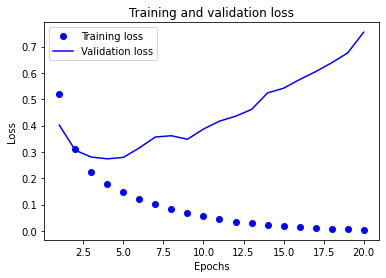

In [ ]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

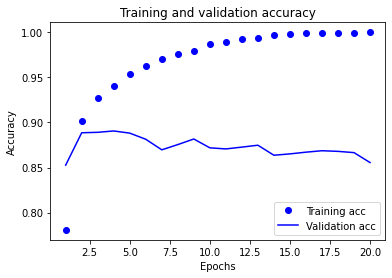

In [ ]:
# 훈련과 검증 정확도 그리기
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

훈련 손실은 에포크마다 감소  
훈련 정확도는 에포크마다 증가  

하지만,  
검증 손실은 에포크마다 증가  
검증 정확도는 에포크마다 감소  

**과대적합(overfitting)**
- 훈련 데이터에 과도하게 최적화 되어 일반화 하지 못함



In [ ]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 26ms/step - loss: 0.4499 - accuracy: 0.8192
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2547 - accuracy: 0.9084
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1982 - accuracy: 0.9285
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3170 - accuracy: 0.8734


In [ ]:
results

[0.31696125864982605, 0.8733599781990051]

### 훈련된 모델로 새로운 데이터에 대해 예측하기

`predict` 메소드를 활용해 리뷰의 긍부정 확률 예측

In [ ]:
model.predict(x_test)

array([[0.26966107],
       [0.9996878 ],
       [0.9837842 ],
       ...,
       [0.23363099],
       [0.1671353 ],
       [0.79296756]], dtype=float32)

## 3.4 뉴스 기사 분류: 다중 분류 예제
### 로이터 데이터 셋

**1986년 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합 데이터**  




In [ ]:
# 로이터 데이터셋 로드하기
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data), len(test_data)

(8982, 2246)

In [ ]:
train_data[10][:10]

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14]

In [ ]:
# 로이터 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '') for i in train_data[0]])

In [ ]:
decoded_newswire.strip()

'said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
import numpy as np

np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

### 데이터 준비

In [ ]:
# 데이터 인코딩하기
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# 함수를 활용한 one-hot 인코딩
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
# 케라스 내장 함수를 이용한 one-hot 인코딩
from keras.utils.np_utils import to_categorical

one_hot_test_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 모델 구성
출력 클래스의 개수 46개  
16개의 은닉 유닛은 46개를 구분하는 데 제약이 많을 수 있음
- 정보의 병목으로 각 층에서 유용한 정보를 잃을 수 있음
- 64개의 은닉 유닉 사용

In [ ]:
# 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [ ]:
# 모델 컴파일하기
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

IMDB와의 차이점
- 은닉 유닛의 개수
- 마지막 Dense 층의 크기
- `softmax` 활성화 함수
 > `softmax` 활성화 함수는 출력 클래스에 대한 확률 분포를 출력하며 총 합은 1
- 손실 함수

### 훈련 검증

In [ ]:
# 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
# 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 66ms/step - loss: 2.5790 - acc: 0.5163 - val_loss: 1.6961 - val_acc: 0.6360
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.3932 - acc: 0.7031 - val_loss: 1.2898 - val_acc: 0.7060
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0314 - acc: 0.7784 - val_loss: 1.1290 - val_acc: 0.7590
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8073 - acc: 0.8314 - val_loss: 1.0445 - val_acc: 0.7790
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6413 - acc: 0.8673 - val_loss: 0.9809 - val_acc: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5029 - acc: 0.8990 - val_loss: 0.9637 - val_acc: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.4096 - acc: 0.9162 - val_loss: 0.9237 - val_acc: 0.8090
Epoch 8/20
16/16 [==============================] - 1s 45ms/step - loss: 0.3295 - a

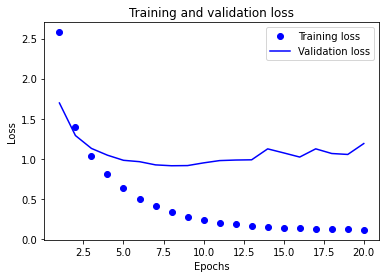

In [ ]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

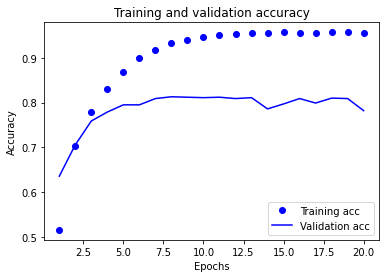

In [ ]:
# 훈련과 검증 정확도 그리기
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

epochs 8
val_loss가 최저  
val_accuracy 최고  

epochs를 8로 조정

In [ ]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

model.fit(partial_x_train,
          partial_y_train,
          epochs = 8,
          batch_size = 512,
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 52ms/step - loss: 2.6364 - acc: 0.4997 - val_loss: 1.7395 - val_acc: 0.6520
Epoch 2/8
16/16 [==============================] - 1s 43ms/step - loss: 1.4102 - acc: 0.7065 - val_loss: 1.3256 - val_acc: 0.7140
Epoch 3/8
16/16 [==============================] - 1s 43ms/step - loss: 1.0627 - acc: 0.7721 - val_loss: 1.1849 - val_acc: 0.7540
Epoch 4/8
16/16 [==============================] - 1s 43ms/step - loss: 0.8514 - acc: 0.8196 - val_loss: 1.0770 - val_acc: 0.7730
Epoch 5/8
16/16 [==============================] - 1s 43ms/step - loss: 0.6862 - acc: 0.8495 - val_loss: 1.0074 - val_acc: 0.7810
Epoch 6/8
16/16 [==============================] - 1s 43ms/step - loss: 0.5529 - acc: 0.8792 - val_loss: 0.9664 - val_acc: 0.7920
Epoch 7/8
16/16 [==============================] - 1s 43ms/step - loss: 0.4444 - acc: 0.9065 - val_loss: 0.9830 - val_acc: 0.7850
Epoch 8/8
71/71 [==============================] - 0s 2ms/step - loss: 0.9783 - acc: 0.790

In [ ]:
results

[0.9783177971839905, 0.7902938723564148]

정확도 약 79%

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18833481745325023

무작위로 정답 분류 시 정확도 약 19%

### 새로운 데이터에 대해 예측하기

In [ ]:
# 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape, np.sum(predictions[0]), np.argmax(predictions[0])

((46,), 1.0, 3)

### 레이블과 손실을 다루는 다른 방법

**정수 텐서로 변환**


In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

위와 같은 방법을 사용하기위해선 손실 함수도 바꿔줘야 한다.



In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

**sparse_categorical_crossentropy**  
**categorical_crossentropy**  

두 손실 함수는 인터페이스만 다를 뿐 수학적으론 동일

### 충분히 큰 중간층을 두어야 하는 이유

마지막 출력이 46차원
- 히든 유닛이 46개보다 적어지면 안 됨
 > 정보의 병목 현상

In [ ]:
# 정보 병복이 있는 모델
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 512, 
          validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 55ms/step - loss: 3.4859 - acc: 0.1213 - val_loss: 3.1868 - val_acc: 0.2370
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 2.9327 - acc: 0.2466 - val_loss: 2.7146 - val_acc: 0.2570
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 2.4442 - acc: 0.3032 - val_loss: 2.3184 - val_acc: 0.3190
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 2.0589 - acc: 0.3578 - val_loss: 2.0309 - val_acc: 0.3470
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 1.7670 - acc: 0.5829 - val_loss: 1.8280 - val_acc: 0.6590
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 1.5434 - acc: 0.7077 - val_loss: 1.6565 - val_acc: 0.6640
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 1.3604 - acc: 0.7235 - val_loss: 1.5284 - val_acc: 0.6770
Epoch 8/20
16/16 [==============================] - 1s 43ms/step - loss: 1.2148 - a

검증 정확도가 약 81.3% 에서 약 71.6% 까지 감소

## 3.5 주택 가격 예측: 회귀 문제
### 보스턴 주택 가격 데이터셋

**1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터**



In [ ]:
# 보스턴 주택 데이터셋 로드하기
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [ ]:
train_targets[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

### 데이터 준비

상이한 스케일을 가진 값을 신경망에 주입하면 문제가 됨
- 경사 하강법 경로가 스케일에 영향을 받음

스케일 맞추는 방법  
**정규화**  
- 각 특성에 대해서 평균을 빼고 표준 편차로 나눔
 > 특성 이란, 입력 데이터 행렬의 열
- 특성의 중앙이 0근처에 맞추어지고 표준 편차가 1이 됨





In [ ]:
# 데이터 정규화하기
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

이때, 훈련 데이터의 평균과 표준편차를 이용해 테스트 데이터를 정규화 시켜준다.

In [ ]:
# 모델 정의하기
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

네트워크의 마지막 층
- 선형층, 전형적인 스칼라 회귀
> 하나의 연속적인 값을 예측하는 회귀

**손실 함수**  
- mse 
> 평균 제곱 오차, 예측과 타깃 사이의 거리의 제곱

**모니터링 지표**  
- mae
> 평균 절대 오차, 예측과 타깃 사이 거리의 절댓값

### K-겹 검증을 사용한 훈련 검증

**데이터를 K개의 분할로 나누고 K개의 모델을 각각 만들어 K-1개의 분할에서 훈련하고 나머지 분할에서 평가하는 방법**  
- 데이터 값이 적고, 훈련/검증 세트를 어떻게 나누느냐에 따라 분산 값이 차이 날 때 사용


In [ ]:
# K-겹 검증기
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('처리중인 폴드 #', i + 1)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    
    model = build_model()
    
    model.fit(partial_train_data, 
              partial_train_targets,
              epochs = num_epochs,
              batch_size = 1,
              verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3
처리중인 폴드 # 4


In [ ]:
all_scores

[2.0466973781585693, 2.1667838096618652, 2.581266164779663, 2.518245220184326]

In [ ]:
np.mean(all_scores)

2.328248143196106

검증 세트의 결과가 모두 다르므로,  
평균 값인 약 2.3의 값이 좀 더 신뢰로움



In [ ]:
# 각 폴드에서 검증 점수를 로그에 저장하기
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('처리중인 폴드 #', i + 1)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, 
                        partial_train_targets,
                        validation_data = (val_data, val_targets),
                        epochs = num_epochs,
                        batch_size = 1,
                        verbose = 0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3
처리중인 폴드 # 4


In [ ]:
# K-겹 검증 점수 평균을 기록하기
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]                       

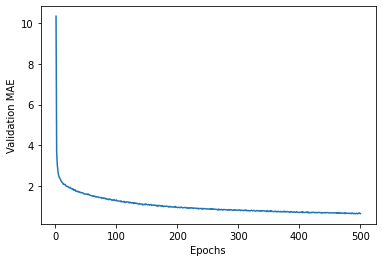

In [ ]:
# 검증 점수 그래프
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

변동이 큰 그래프를 부드럽게 만드는 방법
- 지수 이동 평균

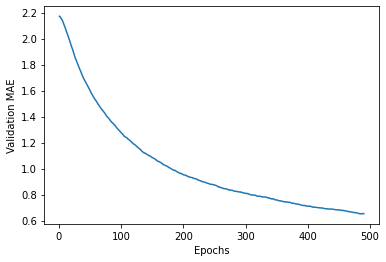

In [ ]:
# 처음 10개의 데이터 포인트를 제외한 검증 점수 그리기
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# 최종 모델 훈련하기
model = build_model()
model.fit(train_data,
          train_targets, 
          epochs = 80,
          batch_size = 16,
          verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 15.7968 - mae: 2.6882


In [ ]:
test_mae_score

2.6881909370422363